In [3]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cycler
import matplotlib
from pandas.plotting import register_matplotlib_converters




#Date de début des observations à prendre en consideration

day = '06'  # '01','02',...., '31'

month = '09' # '01', ..... , '12'

year = '2021' # '2021' ....


alpha = 44.26 #coefficient de normalisation






covid = pd.read_csv('covid_latest.csv', sep= ';')


covid['date'] = covid['date'].apply( lambda date : datetime.strptime(date, "%Y-%m-%d") )




# creation of 2 categories : vaccinated, non-vaccinated
covid['vac_statut'] = covid['vac_statut'].replace(['Non-vaccinés','Primo dose récente'],'vaccinés' )

covid['vac_statut'] = covid['vac_statut'].replace(['Complet de moins de 3 mois - avec rappel',
                                                'Complet entre 3 mois et 6 mois - sans rappel',
                                                'Complet de moins de 3 mois - sans rappel', 'Primo dose efficace',
                                                'Complet entre 3 mois et 6 mois - avec rappel',
                                                'Complet de 6 mois et plus - sans rappel',
                                                'Complet de 6 mois et plus - avec rappel'],'non-vaccinés' )







covid = covid.groupby(['date','vac_statut']).sum().reset_index()

covid = covid.sort_values(by=["date"],ascending=True )

covid= covid.set_index('date')




#population_france = 66931755.21


string_date = '-'.join([year,month,day])

Date_start = datetime.strptime(string_date, "%Y-%m-%d")

covid = covid.loc[string_date:]



nn_vac = covid[covid['vac_statut']=='non-vaccinés']

vac = covid[covid['vac_statut']=='vaccinés']







def tracer_la_courbe(graph_letter,nor=False):


        



        va_keys = { 'a': ['nb_PCR+' ,'graph a','Nombre de Test+','nombre de Test+ par 100K habitant'],

                        'b': ['nb_PCR+_sympt','graph b','Test positif asymptomatique','Test positif asymptomatique par 100K habitant'],

                        'c': ['HC','graph c','Hospitalisation','Hospitalisation par 100K habitant'],

                        'd': ['SC','graph d','Entrées en soins critiques','Entrées en soins critiques par 100K habitant']}


        assert len(nn_vac)==len(vac), 'Attention problème de format de données '


        date_axe = sorted(list(vac.index))
        

        if nor:

                sns.lineplot(
                        x= date_axe,
                        y= vac[va_keys[graph_letter][0]].rolling(7).mean()/alpha)

                sns.lineplot(
                        x= date_axe,
                        y= nn_vac[va_keys[graph_letter][0]].rolling(7).mean()/alpha)

                plt.ylabel(va_keys[graph_letter][3])

                

        else:

                sns.lineplot(
                        x= date_axe,
                        y= vac[va_keys[graph_letter][0]].rolling(7).mean())

                sns.lineplot(
                        x= date_axe,
                        y= nn_vac[va_keys[graph_letter][0]].rolling(7).mean())

                plt.ylabel(va_keys[graph_letter][2])

                

        plt.xlabel('Date')
        plt.title(f'graph {graph_letter}')
        plt.legend( labels=['vaccinés','non-vaccinés'])
        plt.show()





sns.set(rc={'figure.figsize':(10,7)})
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)  
register_matplotlib_converters()













 graph a normalisé


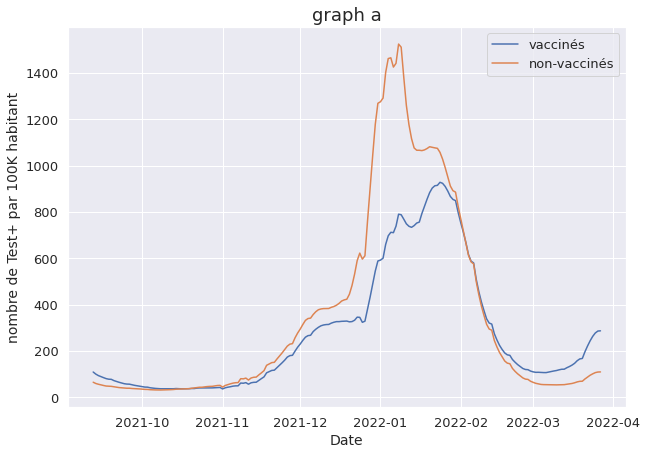

 graph a absolu


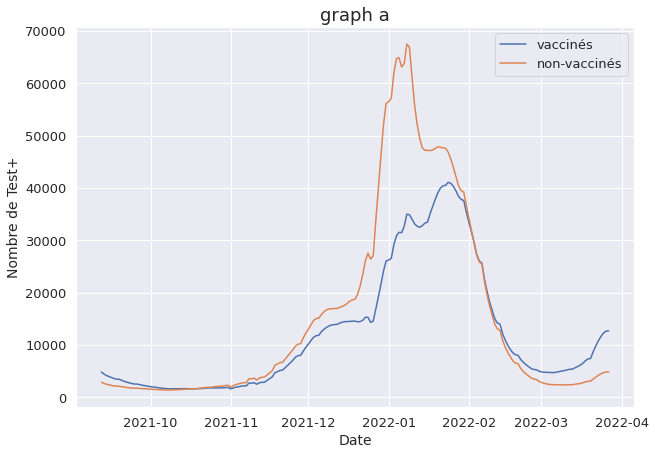

 graph b normalisé


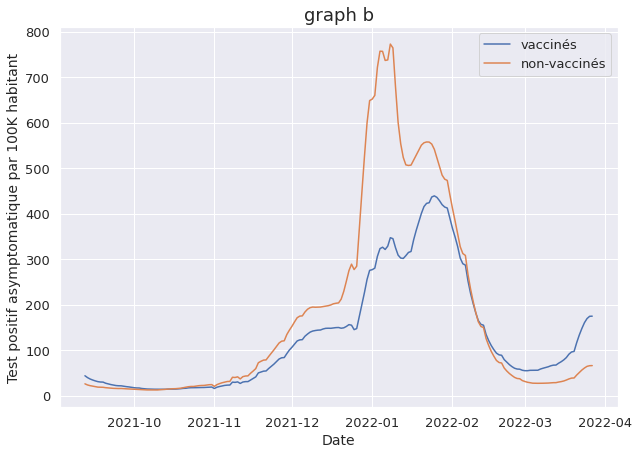

 graph b absolu


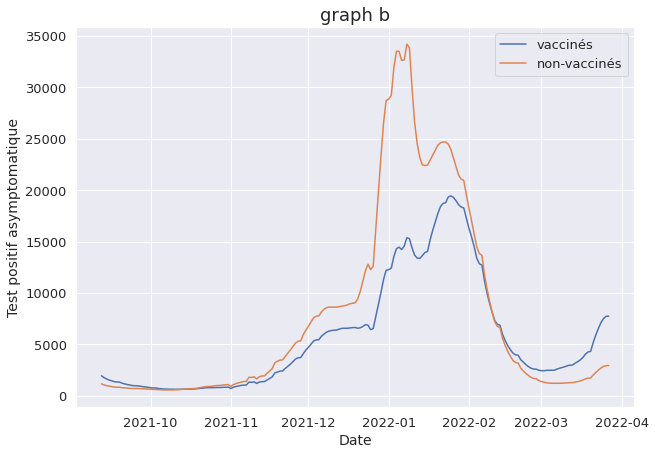

 graph c normalisé


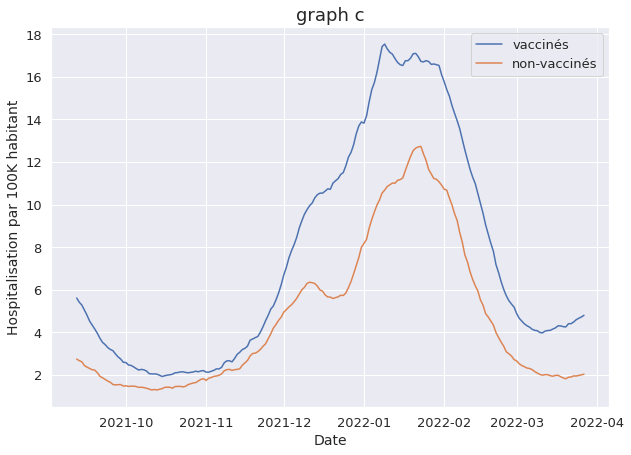

 graph c absolu


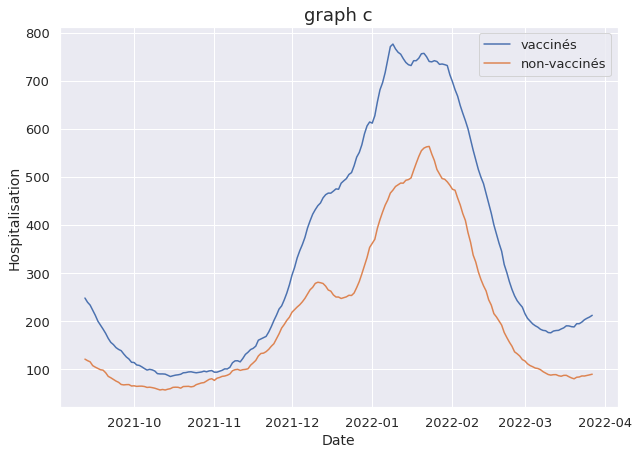

 graph d normalisé


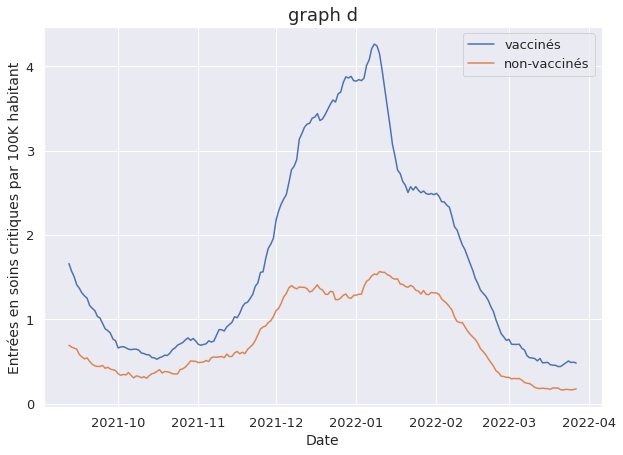

 graph d absolu


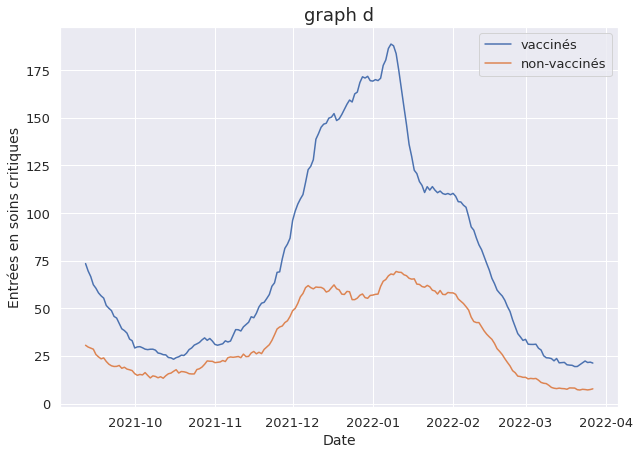

In [4]:
for k in 'abcd':

    print(f' graph {k} normalisé')

    tracer_la_courbe(k,nor=True)

    print(f' graph {k} absolu')
    tracer_la_courbe(k,nor=False)